### 폰트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (14.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and direc

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())


print ('설정파일 위치: ', mpl.matplotlib_fname())


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

font_list

버전:  3.7.1
설치 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc
29


['/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/

In [ ]:
# seabron으로 그래프 스타일 설정
import seaborn as sns

"""
아래 5개중 원하는 그래프 스타일 설정.
"""
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('white')
# sns.set_style('ticks')

#----------------------------------------------------위 아래가 아예 다른내용이지만, seaborn설정후 폰트적용 셀을 매번 꼭 다시 실행해줘야하기에 셀을 붙여놨습니다.

# matplot으로 한글 font 설정
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 사용시 글자를 선명하게
%config InlineBackend.figure_format = 'retina'

# '-' 음수 부호 보이게 설정
matplotlib.rc('axes', unicode_minus=False)

# 한글 폰트 설치
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumGothic')

### 라이브러리 호출

In [ ]:
# 연산 처리  패키지
import pandas as pd
import numpy as np
import math

# 전처리 패키지
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC

# 모델 패키지
from xgboost.sklearn import XGBClassifier # from xgboost import XGBClassifier

# 평가지표 패키지
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, mean_squared_error, precision_score, recall_score

# 시각화 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

### Data 불러오기

In [ ]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

### dataframe 이름 넣기 ###
### 여기에서 데이터셋 수정 ###
data_name = "2122211"

# 데이터 읽어오기
df = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_파생변수.csv")

Mounted at /content/drive


In [ ]:
df

,여성,외산,1인 및 지정1인,가족 및 지정1인,가족및형제자매한정,가족한정(형제자매제외),기명피보험자1인한정,누구나(기본),부부 및 지정1인,부부한정,...,8.0,1억이하,5천만원이하,미가입.1,연령numeric,차량경과numeric,마일리지numeric,특약전년도사고율,특약예측사고율,사고유무
0,True,False,False,False,False,True,False,False,False,False,...,True,False,True,False,19,7.80,15,0.16,0.087615,1
1,True,False,False,False,False,False,False,True,False,False,...,True,False,True,False,19,3.16,0,0.12,0.055043,1
2,True,False,False,False,False,True,False,False,False,False,...,True,False,False,True,19,12.86,0,0.16,0.087615,0
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,19,3.16,15,0.16,0.087615,0
4,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,19,3.16,15,0.16,0.087615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187978,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,44,3.16,15,0.11,0.043751,0
187979,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,44,12.86,15,0.12,0.055043,0
187980,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,44,3.16,0,0.16,0.087615,1
187981,False,False,False,False,False,False,False,True,False,False,...,True,False,False,True,44,12.86,7,0.12,0.055043,0


### Model 함수 정의

In [ ]:
# 로지스틱 회귀 그리드서치
def xgb_gridsearch(X, y):

    # 하이퍼파라미터 그리드 설정
    param_grid = {
        'n_estimators' : [100, 300, 500],
        'learning_rate' : [0.05, 0.1, 0.15],
        'max_depth' : [3, 6, 9], # ,15
        'gamma' : [0, 1, 2, 3],
        'colsample_bytree' : [0.8, 0.9, 1],
    }

    # 저장 list
    auc = []

    acc = []
    prec = []
    rec = []
    f1 = []
    spec =  []

    opt_acc = []
    opt_prec = []
    opt_rec = []
    opt_f1 = []
    opt_spec = []

    opt_thres = []
    best_param = []

    # 멈추는 경우를 방지하려면 range 조절
    for i in range(100):

        # smote 전 data type 변환
        bool_mask = X.dtypes == np.bool_
        bool_cols = X.columns[bool_mask].tolist()

        for col_name in bool_cols:
            X[col_name] = X[col_name].astype(int)

        # y 범주 비율에 맞춰 train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

        # 데이터 Random Sampling
        X_train_rd = X_train.sample(n = 15000)
        y_train_rd = y_train[X_train_rd.index]

        # SMOTE oversampling
        smt = SMOTE(sampling_strategy = 'auto')
        X_train_sm, y_train_sm = smt.fit_resample(X_train_rd, y_train_rd)

        # GridSearchCV를 사용한 하이퍼파라미터 튜닝
        CV_lr = GridSearchCV(XGBClassifier(n_jobs = -1), param_grid = param_grid, cv = 5, scoring = 'roc_auc')
        CV_lr.fit(X_train_sm, y_train_sm)

        # 최적의 파라미터 저장
        best_param.append(CV_lr.best_params_)

        # 테스트 데이터셋에 대한 예측 수행
        y_pred = CV_lr.predict(X_test)

        # AUC 계산, threshold 기준 평가를 위한 발생 확률 계산
        y_proba = CV_lr.predict_proba(X_test)[:, 1]

        # 기본 평가지표
        auc.append(roc_auc_score(y_test, y_proba))

        acc.append(accuracy_score(y_test, y_pred))
        prec.append(precision_score(y_test, y_pred))
        rec.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        spec.append((tn / (tn + fp)))

        # 최적 threshold 값 & 그 때의 FPR 출력
        fper, tper, thresholds = roc_curve(y_test, y_proba)  # thresholds 별 fpr tpr 계산
        optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
        optimal_threshold = thresholds[optimal_idx]

        # 최적 threshold 평가지표
        y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

        opt_acc.append(accuracy_score(y_test, y_optpred))
        opt_prec.append(precision_score(y_test, y_optpred))
        opt_rec.append(recall_score(y_test, y_optpred))
        opt_f1.append(f1_score(y_test, y_optpred, average='weighted'))

        tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_optpred).ravel()
        opt_spec.append((tn2 / (tn2 + fp2)))

        opt_thres.append(thresholds[optimal_idx])

        # 횟수 출력
        print(f"{i+1}번째 완료")

        # 결과 DataFrame 생성
        result = pd.DataFrame({
            'auc' : auc,
            'accuracy' : acc,
            'precision' : prec,
            'recall' : rec,
            "f1-score" : f1,
            "specificity" : spec,
            'opt_accuracy' : opt_acc,
            'opt_precision' : opt_prec,
            'opt_recall' : opt_rec,
            "opt_f1-score" : opt_f1,
            "opt_specificity" : opt_spec,
            "best_params" : best_param,
            "opt_threshold" : opt_thres
        })
        result.to_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝_5.csv", index = False)

    return result

### 튜닝 모델 실행

In [ ]:
yn_X = df.drop(columns = ['사고유무'], axis = 1)
yn_y = df['사고유무']

In [ ]:
# 처음 시작할 때
total = pd.DataFrame()

# 이미 실행한 게 있을 경우
# total = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝.csv")

df_result = xgb_gridsearch(yn_X, yn_y)
df_result

# df_result.to_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝.csv", index = False)

1번째 완료
2번째 완료
3번째 완료
4번째 완료
5번째 완료
6번째 완료
7번째 완료
8번째 완료
9번째 완료
10번째 완료
11번째 완료
12번째 완료
13번째 완료
14번째 완료
15번째 완료
16번째 완료
17번째 완료
18번째 완료
19번째 완료


In [ ]:
# 결과 합치기
rst1 = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝.csv")
rst2 = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝_2.csv")
rst3 = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝_3.csv")
rst4 = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝_4.csv")
rst5 = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝_5.csv")
rst6 = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/XGB/XGB최종/결과/XGB_{data_name}_튜닝_6.csv")

df_result = pd.concat([rst1, rst2, rst3, rst4, rst5, rst6], axis = 0)
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 17
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   auc              101 non-null    float64
 1   accuracy         101 non-null    float64
 2   precision        101 non-null    float64
 3   recall           101 non-null    float64
 4   f1-score         101 non-null    float64
 5   specificity      101 non-null    float64
 6   opt_accuracy     101 non-null    float64
 7   opt_precision    101 non-null    float64
 8   opt_recall       101 non-null    float64
 9   opt_f1-score     101 non-null    float64
 10  opt_specificity  101 non-null    float64
 11  best_params      101 non-null    object 
 12  opt_threshold    101 non-null    float64
dtypes: float64(12), object(1)
memory usage: 11.0+ KB


### 결과 확인

In [ ]:
print(df_result.sort_values(by=["auc"], ascending = False)['best_params'].iloc[0])

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}


### Best Parameter로 threshold 찾기


In [ ]:
# 로지스틱 회귀 함수
def xgb_threshold(X, y):

    # 평가지표 list
    auc = []

    acc_opt = []
    prec_opt = []
    recall_opt = []

    opt_thres = []

    # 멈추는 경우를 방지하려면 range 조절
    for i in range(100):

        # smote 전 data type 변환
        bool_mask = X.dtypes == np.bool_
        bool_cols = X.columns[bool_mask].tolist()

        for col_name in bool_cols:
            X[col_name] = X[col_name].astype(int)

        # y 범주 비율에 맞춰 train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

        # 데이터 Random Sampling
        X_train_rd = X_train.sample(n = 15000)
        y_train_rd = y_train[X_train_rd.index]

        # SMOTE oversampling
        smt = SMOTE(sampling_strategy = 'auto')
        X_train_sm, y_train_sm = smt.fit_resample(X_train_rd, y_train_rd)

        # LogisticRegression 초기화
        model = XGBClassifier(
            n_estimators = 300,
            learning_rate = 0.1,
            max_depth = 9,
            gamma = 0,
            colsample_bytree = 0.8
        )

        # 모델 학습
        model.fit(X_train, y_train)

        # 테스트 데이터셋에 대한 예측 수행
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Optimal thr 저장
        fper, tper, thresholds = roc_curve(y_test, y_proba)
        optimal_idx = np.argmax(tper - fper)   # fpr, tpr 간 차이가 가장 클 때의 index 저장

        # Optimal thr일 때 평가지표 저장
        y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

        auc.append(roc_auc_score(y_test, y_proba))

        acc_opt.append(accuracy_score(y_test, y_optpred))
        prec_opt.append(precision_score(y_test, y_optpred))
        recall_opt.append(recall_score(y_test, y_optpred))

        opt_thres.append(thresholds[optimal_idx])

        # 횟수 출력
        if ((i+1)%5 == 0) :
            print(f"{i+1}번째 완료")

    # 결과 DataFrame 생성
    results = pd.DataFrame({
        'auc': auc,
        'accuracy' : acc_opt,
        'precision' : prec_opt,
        'recall' : recall_opt,
        'threshold' : opt_thres
    })

    return results

In [ ]:
thr = xgb_threshold(yn_X, yn_y)
thr

5번째 완료
10번째 완료
15번째 완료
20번째 완료
25번째 완료
30번째 완료
35번째 완료
40번째 완료
45번째 완료
50번째 완료
55번째 완료
60번째 완료
65번째 완료
70번째 완료
75번째 완료
80번째 완료
85번째 완료
90번째 완료
95번째 완료
100번째 완료


,auc,accuracy,precision,recall,threshold
0,0.601430,0.550682,0.176183,0.608005,0.125548
1,0.600910,0.572971,0.178794,0.577365,0.133416
2,0.592188,0.488816,0.166849,0.671199,0.109343
3,0.599186,0.549565,0.175881,0.608579,0.126767
4,0.596584,0.603027,0.180885,0.526618,0.142830
...,...,...,...,...,...
95,0.605358,0.589728,0.181534,0.556875,0.137205
96,0.596251,0.549964,0.174513,0.600536,0.127161
97,0.591622,0.562944,0.174090,0.573344,0.131593
98,0.597459,0.501609,0.169632,0.664496,0.113315


In [ ]:
# thres_value = thr['threshold'].median()
thres_value = 0.13089496

### test 결과 생성

In [ ]:
# xgb test 함수
def xgb_test(X_train, X_test, y_train, y_test):

    # smote 전 data type 변환
    bool_mask = X_train.dtypes == np.bool_
    bool_cols = X_train.columns[bool_mask].tolist()

    for col_name in bool_cols:
        X_train[col_name] = X_train[col_name].astype(int)
        X_test[col_name] = X_test[col_name].astype(int)

    # SMOTE oversampling
    smt = SMOTE(sampling_strategy = 'auto')
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

    # LogisticRegression 초기화
    model = XGBClassifier(
            n_estimators = 300,
            learning_rate = 0.1,
            max_depth = 9,
            gamma = 0,
            colsample_bytree = 0.8,
            random_state = 33
        )

    # 모델 학습
    model.fit(X_train_sm, y_train_sm)

    # 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 기본 평가지표
    auc = roc_auc_score(y_test, y_proba)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)

    # 최적 threshold 평가지표
    y_optpred = (y_proba > thres_value).astype(int)

    opt_accuracy = accuracy_score(y_test, y_optpred)
    opt_precision = precision_score(y_test, y_optpred)
    opt_recall = recall_score(y_test, y_optpred)
    opt_f1 = f1_score(y_test, y_optpred, average='weighted')

    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_optpred).ravel()
    opt_specificity = tn2 / (tn2 + fp2)

    print(f"{i}번째 AUC : {auc}")

    return auc, accuracy, recall, precision, f1, specificity, opt_accuracy, opt_recall, opt_precision, opt_f1, opt_specificity, y_proba, y_optpred

In [ ]:
# 총 188168 개의 데이터 확인
# 전처리 했기에 null값 없는거 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187983 entries, 0 to 187982
Data columns (total 36 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   여성            187983 non-null  bool   
 1   외산            187983 non-null  bool   
 2   1인 및 지정1인     187983 non-null  bool   
 3   가족 및 지정1인     187983 non-null  bool   
 4   가족및형제자매한정     187983 non-null  bool   
 5   가족한정(형제자매제외)  187983 non-null  bool   
 6   기명피보험자1인한정    187983 non-null  bool   
 7   누구나(기본)       187983 non-null  bool   
 8   부부 및 지정1인     187983 non-null  bool   
 9   부부한정          187983 non-null  bool   
 10  임직원한정         187983 non-null  bool   
 11  미가입           187983 non-null  bool   
 12  연령대           187983 non-null  int64  
 13  C             187983 non-null  bool   
 14  D             187983 non-null  bool   
 15  N             187983 non-null  bool   
 16  Z             187983 non-null  bool   
 17  차량경과년수        187983 non-null  int64  
 18  차종  

In [ ]:
rows = len(df)

# 행 개수의 절반을 계산하고 정수로 변환
half_rows = rows // 2

# 데이터프레임을 절반으로 나누기
train_df = df.iloc[:half_rows]
test_df = df.iloc[half_rows:]

print("trainset 데이터 갯수: ",len(train_df)) # 94804개 확인
print("testset 데이터 갯수: ", len(test_df)) #94804개 확인


# y값 비율 잘 섞였는지 확인 -> 필요한가? 일단 비율은 비슷함
print("\n========train set y값 비율==============")
print(train_df['사고유무'].value_counts())
print("========test set y값 비율==============")
print(test_df['사고유무'].value_counts())

trainset 데이터 갯수:  93991
testset 데이터 갯수:  93992

========train set y값 비율==============
사고유무
0    81123
1    12868
Name: count, dtype: int64
========test set y값 비율==============
사고유무
0    80750
1    13242
Name: count, dtype: int64


In [ ]:
# train X, y 데이터셋 만들기
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

X_train = train_df.drop(columns=['사고유무'])
y_train = train_df['사고유무']

In [ ]:
# test data 생성
test_dfs = []
for i in range(100):
    # 각 반복마다 다른 랜덤 시드 설정 0~99
    np.random.seed(i)

    # 데이터프레임에서 임의의 10000개 행 추출
    sample_df = test_df.sample(n=10000)

    # 결과 확인
    test_dfs.append(sample_df)

In [ ]:
# 모델 학습  & test 결과

auc = []

acc = []
prec = []
rec = []
f1 = []
spec = []

optacc = []
optprec = []
optrec = []
optspec = []
optf1 = []

for i in range(100):

    train = train_df # .sample(n=10000).reset_index(drop=True) # train set 은 걍 데이터 뽑으면 됩니다
    test = test_dfs[i].reset_index(drop=True)
    print(test.iloc[0].tolist())

    X_train = train.drop(columns = ['사고유무'], axis = 1)
    y_train = train['사고유무']

    X_test = test.drop(columns = ['사고유무'], axis = 1)
    y_test = test['사고유무']

    aucc, accuracy, recall, precision, f1_sc, specificity, opt_accuracy, opt_recall, opt_precision, opt_f1_sc, opt_specificity, y_proba, y_optpred = xgb_test(X_train, X_test, y_train, y_test)

    test_rst = pd.DataFrame({'y_hat' : y_optpred, 'y_proba' : y_proba})
    test_rst.to_csv(f"/content/drive/MyDrive/기계학습의이해/코드테스트xgb/output{i}.csv", index = False)

    auc.append(aucc)
    acc.append(accuracy)
    prec.append(precision)
    rec.append(recall)
    f1.append(f1_sc)
    spec.append(specificity)

    optacc.append(opt_accuracy)
    optprec.append(opt_precision)
    optrec.append(opt_recall)
    optf1.append(opt_f1_sc)
    optspec.append(opt_specificity)

    if((i+1) % 10 == 0):
        print(f"{(i+1)}% 완료")

# 결과 DataFrame 생성
results = pd.DataFrame({
    'auc' : aucc,
    'accuracy' : acc,
    'precision' : prec,
    'recall' : rec,
    "f1-score" : f1,
    "specificity" : spec,
    'opt_accuracy' : optacc,
    'opt_precision' : optprec,
    'opt_recall' : optrec,
    "opt_f1-score" : optf1,
    "opt_specificity" : optspec
})


# csv 저장
results.to_csv(f"/content/drive/MyDrive/기계학습의이해/코드테스트xgb/XGB_test_평가지표.csv", index = False)

[True, True, False, False, False, False, False, False, False, True, False, True, 40, False, False, False, True, 2, 1, 6, False, False, False, False, True, False, False, False, True, False, 44, 7.8, 0, 0.11, 0.043750722, 1]
0번째 AUC : 0.5637310430261382
[False, True, False, False, False, False, False, False, False, True, False, True, 50, False, False, True, False, 2, 3, 6, False, False, False, False, True, False, False, False, False, True, 54, 7.8, 0, 0.11, 0.043750722, 0]
1번째 AUC : 0.5696259355911173
[False, False, True, False, False, False, False, False, False, False, False, False, 40, False, False, False, False, 2, 2, 6, False, False, False, False, False, False, True, False, False, True, 44, 7.8, 0, 0.12, 0.045383185, 0]
2번째 AUC : 0.5632987576974352
[True, False, False, False, False, False, False, False, False, True, False, True, 60, True, False, False, False, 0, 1, 6, False, False, False, False, False, True, False, False, True, False, 64, 0.0, 0, 0.11, 0.043750722, 0]
3번째 AUC : 0.572

### Boxplot

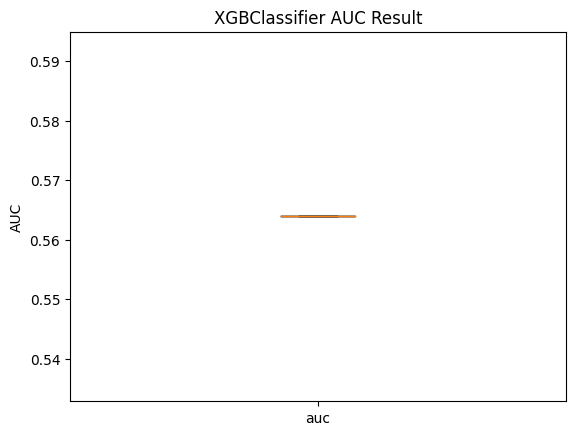

In [ ]:
# boxplot 그리기
plt.boxplot(results['auc'])

# 그래프에 레이블 추가
plt.xticks([1], ['auc'])  # x축 레이블 설정
plt.ylabel('AUC')  # y축 레이블 설정
plt.title('XGBClassifier AUC Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

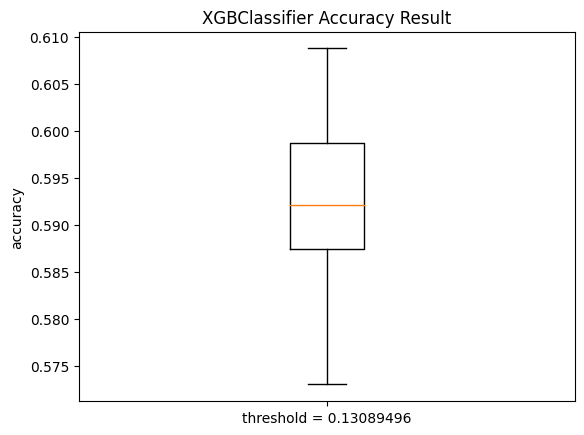

In [ ]:
# boxplot 그리기
plt.boxplot(results['opt_accuracy'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('accuracy')  # y축 레이블 설정
plt.title('XGBClassifier Accuracy Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

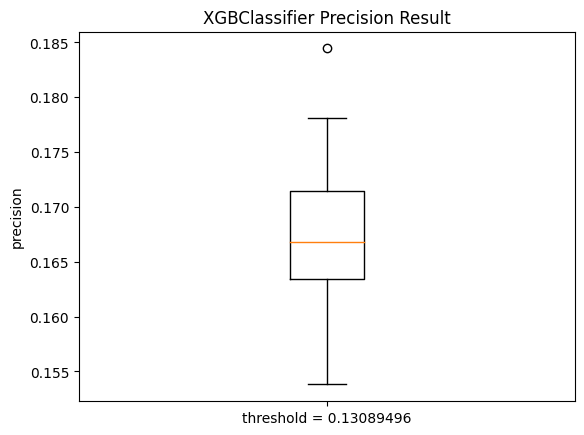

In [ ]:
# boxplot 그리기
plt.boxplot(results['opt_precision'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('precision')  # y축 레이블 설정
plt.title('XGBClassifier Precision Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

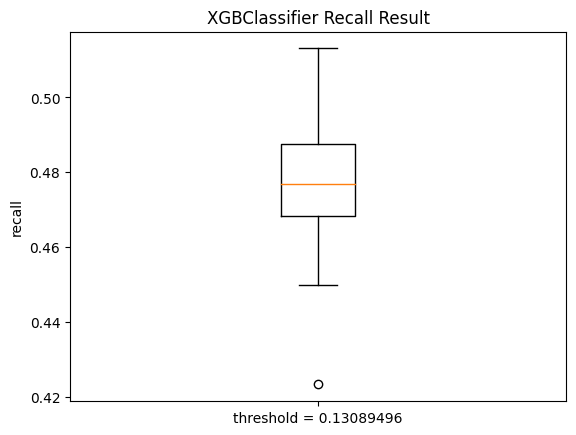

In [ ]:
# boxplot 그리기
plt.boxplot(results['opt_recall'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('recall')  # y축 레이블 설정
plt.title('XGBClassifier Recall Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

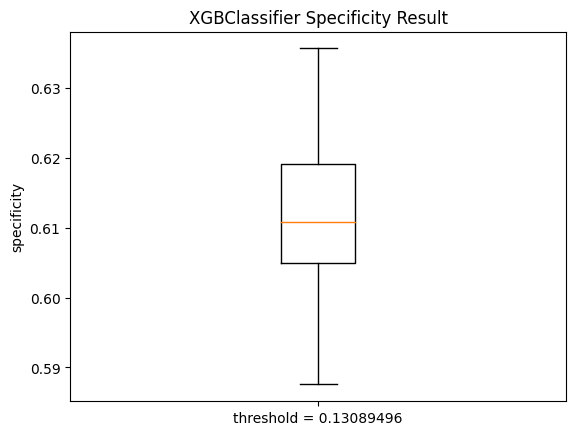

In [ ]:
# boxplot 그리기
plt.boxplot(results['opt_specificity'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('specificity')  # y축 레이블 설정
plt.title('XGBClassifier Specificity Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

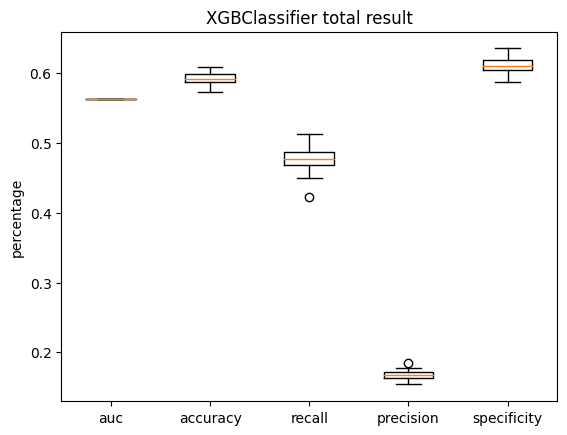

In [ ]:
# 전체 boxplot 그리기
plt.boxplot([results['auc'], results['opt_accuracy'], results['opt_recall'], results['opt_precision'], results['opt_specificity']])

# 그래프에 레이블 추가
plt.xticks([1, 2, 3, 4, 5], ['auc', 'accuracy', 'recall', 'precision', 'specificity'])  # x축 레이블 설정
plt.ylabel('percentage')  # y축 레이블 설정
plt.title('XGBClassifier total result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()